### Finding Heavy Traffic Indicators on I-94

Our aim is to analyze the I-94 Intersttae highway dataset and determine few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read dataset
traffic_data=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
# Initial steps of examining the dataset
traffic_data.head(3)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [4]:
traffic_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic_data.shape

(48204, 9)

In [6]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
traffic_data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

From the initial analysis we found that the dataset consists of <b> 48204 rows and 9 columns </b>. Out of the 9 columns, 3 variables are float datatype, 2 variables are int64 datatype and 4 variables are of object/string datatype. From the initial analysis, we found that there are no 'na' values. However, the 'Holiday' column only has none values in it. We might need to replace none with na for further analysis.

The dataset records the westbound traffic in the proximity of a station between Minneaplois and Saint paul. Therefore our analysis results are just based on the west bound traffic and hence cannot be generalized for the entire I-94 highway.

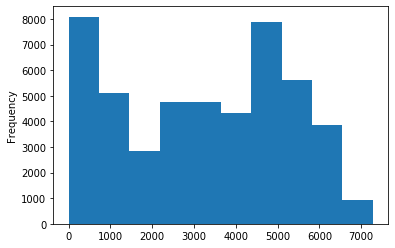

In [8]:
traffic_data['traffic_volume'].plot.hist()
plt.show()

In [9]:
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars. We can see that 25% of the time, there were only 1193 cars or fewer passing the station each hour. The lower number of cars can be due to nightime or when the road is under construction. therefore we have to analyze the traffic during daytime and nighttime and compare results.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [10]:
traffic_data['date_time']=pd.to_datetime(traffic_data['date_time'])
day=traffic_data[(traffic_data['date_time'].dt.hour >= 7) & (traffic_data['date_time'].dt.hour < 19)]
day.shape

(23877, 9)

In [11]:
night=traffic_data[(traffic_data['date_time'].dt.hour >=19) | (traffic_data['date_time'].dt.hour < 7)] 
night.shape

(24327, 9)

In [12]:
traffic_data.iloc[170:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
170,None,285.11,0.0,0.0,90,Clouds,overcast clouds,2012-10-09 21:00:00,2306
171,None,283.46,0.0,0.0,90,Clouds,overcast clouds,2012-10-09 22:00:00,1846
172,None,282.45,0.0,0.0,90,Clouds,overcast clouds,2012-10-09 23:00:00,947
173,None,281.88,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 00:00:00,494
174,None,281.78,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 01:00:00,332
175,None,281.09,0.0,0.0,75,Clouds,broken clouds,2012-10-10 02:00:00,261
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


Since we divided the day and night with 12 hrs, the number of data points for daytime and night time should be the same. But when we check the count of night and day dataframes we found that their row numbers does not match. This is due to the missing data. In some hours, the data was not collected. For example if we look at rows 176 and 177 of the traffic_data we can see that there is no data for 4 am and 5 am. 

In [13]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

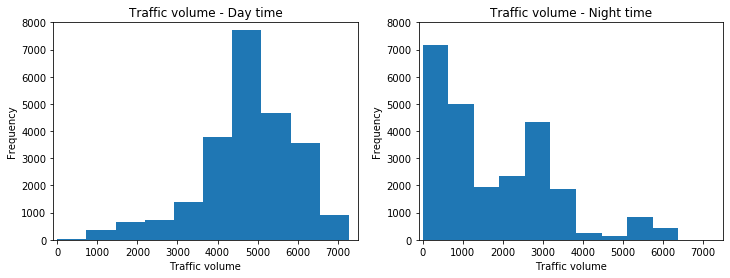

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic volume - Day time')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim([-100,7500])
plt.ylim([0,8000])


plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic volume - Night time')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim([-100,7500])
plt.ylim([0,8000])

plt.show()

In [15]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the histogram, we understand that **the distribution of traffic volume in day time is left skewed** and most of the values are high and the **average traffic is 4762 cars per hour** and more than 4252 cars passes that station 75 percent of the time.

**The distribution of traffic volume during night time is right skewed and the average number of cars that passes the station in an hour is 1785 cars**. 75% of the time, the number of cars that passed the station was less than 2819.

*Since the traffic in night time is lighter than the day time traffic, and our goal is to find the indicators of heavier traffic, we are only considering the day time data for our further analysis*.

### Time Indicator

Here we are analyzing how the time affects the traffic. We are analyzing how traffic is affected each month and what time of the day has the highest traffic.

First we plot a line plot to visualize how the traffic volume changed each month on average.

In [16]:
day=day.copy()
day['month']=day['date_time'].dt.month
by_month=day.groupby('month').mean()
by_month=pd.DataFrame(by_month['traffic_volume']).reset_index()

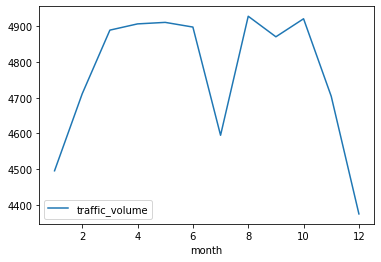

In [18]:
by_month.plot.line(x='month',y='traffic_volume')
plt.show()

After analyzing the line plot we can observe that traffic is less during winter months i.e. from November to February. traffic is higher from months March till October. However from the plot we can understand there is a dip in traffic during the month July. 

To analyze what happened in July, Let's analyze the average traffic volume in July in the last 6 years i.e. from 2012 to 2018.

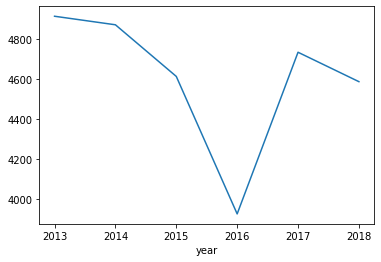

In [19]:
day['year']=day['date_time'].dt.year
only_july=day[day['month']==7]
only_july.groupby('year')['traffic_volume'].mean().plot.line()
plt.show()

After analyzing the average traffic volume in July over the past three yeras, we found that traffic volume was higher in all years except 2016. This could have been due to any road construction.

**Therefore, we can conclude that traffic is higher during warm months compared to cold months**.

Now, let us analyze how traffic volume is affected by day of week.

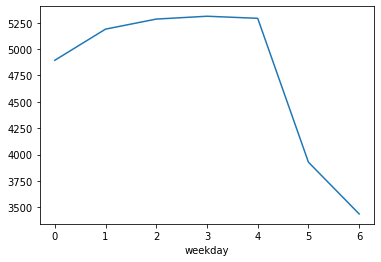

In [20]:
day['weekday']=day['date_time'].dt.dayofweek
by_weekday=day.groupby('weekday')['traffic_volume'].mean()
by_weekday.plot.line()
plt.show()


In [21]:
by_weekday

weekday
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

**Traffic volume is higher during business days and lower during weekends**. In the plot, '0' indicates Monday and '6' indicates Sunday. The highest traffic of 5311 cars per hour is observed on Thursday and lowest traffic of 3436 cars per hour was recorded on Sunday.

Now, let us analyze the traffic volume based on the time of the day. Since the weekends have  average traffic volume very less, inorder to anlyze which time of the day has highest traffic, we are going to look at the averages seperately. For that, we are creating two dataframes for business days and weekends and we are going to analyze how traffic varies over time. We finally will plot a relational chart to compare how traffic volume changes throughout business days and weekends.



In [22]:
business_days=day[(day['weekday'] >= 0) & (day['weekday'] < 5)]
business_days.shape

(17085, 12)

In [23]:
weekends=day[day['weekday'] >= 5]
weekends.shape

(6792, 12)

In [24]:
business_days=business_days.copy()
business_days['hour']=business_days['date_time'].dt.hour
by_hour_businessdays=business_days.groupby('hour')['traffic_volume'].mean()
by_hour_businessdays

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [25]:
weekends=weekends.copy()
weekends['hour']=weekends['date_time'].dt.hour
by_hour_weekend=weekends.groupby('hour')['traffic_volume'].mean()


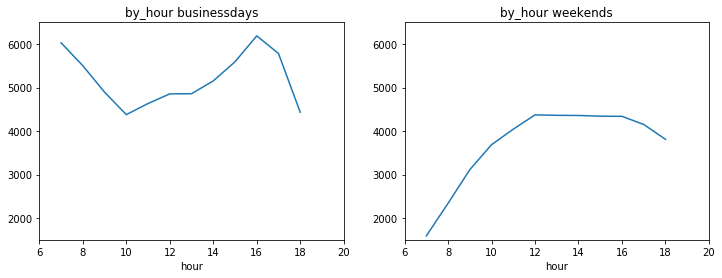

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
by_hour_businessdays.plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('by_hour businessdays')

plt.subplot(1,2,2)
by_hour_weekend.plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('by_hour weekends')

plt.show()

From the plot, we can understand that traffic during business days were highest at 7 am and 4 pm. This makes sense because people go to work mostly at 7 am and leave work by 4 pm. This explains the heavier traffic at 7 am and 4 pm. Whereas in weekends, heavier traffic is observed from 12 pm to 6 pm. 

To summarize our analysis of how time affects the traffic:
* Traffic is heavier in warm months (March - October) compared to cold months (Nov - Feb)
* Traffic is heavier in business days compared to weekends
* On business days, the rush hours are around 7 and 16 hrs, i.e 7 am and 4 pm.

### Weather Indicator

To understand the effect of weather conditions on traffic volume, we first find the correlation between variables. When we find the correlation, important point to remember is that correlation function only calculates the correlation between numerical variables, this means that we would not be able to understand the effect of weather main and weather description on traffic volume from the correlation.

In [27]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
weekday          -0.416453
Name: traffic_volume, dtype: float64

From the coreelation results we found that the temp variable has some positive correlation with traffic volume whereas weather variables did not have any impact on traffic volume. To better understamd the effect of temp on traffic volume, let us plot a scatter plot and find whether temp is a strong weather indicator.

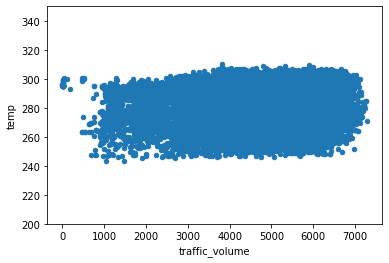

In [28]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(200,350)
plt.show()

From the scatter plot, we can conclude that weather is not a strong indicator of heavy traffic.

Let's look at other weather columns such as weather_main and weather_description.

In [29]:
by_weather_main=day.groupby('weather_main')['traffic_volume'].mean()
by_weather_main

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

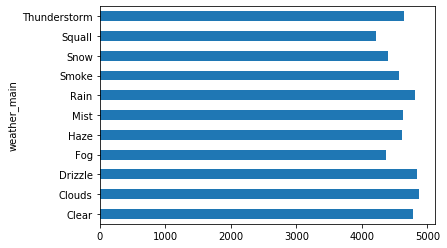

In [30]:
by_weather_main.plot.barh()
plt.show()

In [31]:
by_weather_description=day.groupby('weather_description')['traffic_volume'].mean()

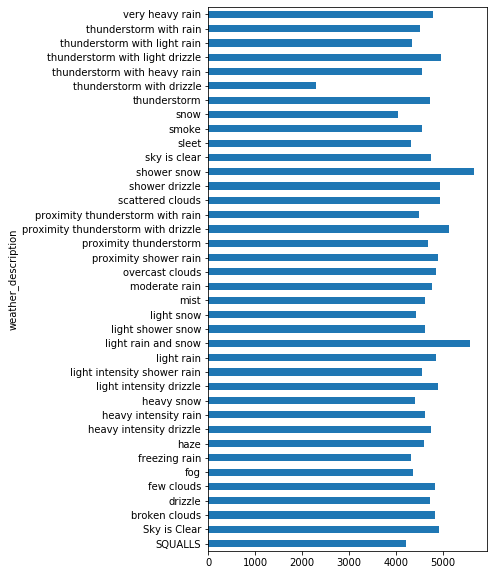

In [32]:
by_weather_description.plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather conditions where traffic volume was greater than 5000 cars per hour.
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

### Conclusion

In this project, we tried to anlyze the I-94 dataset and identify the main indicators of heavy traffic. The main indicators we found are time and weather indicators.

* Time indicators
    * Traffic is heavier in warm months (March - October) compared to cold months (Nov - Feb)
    * Traffic is heavier in business days compared to weekends
    * On business days, the rush hours are around 7 and 16 hrs, i.e 7 am and 4 pm.
    
* Weather indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle